<a href="https://colab.research.google.com/github/PC2102/MetricasRendimiento-HPC02/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

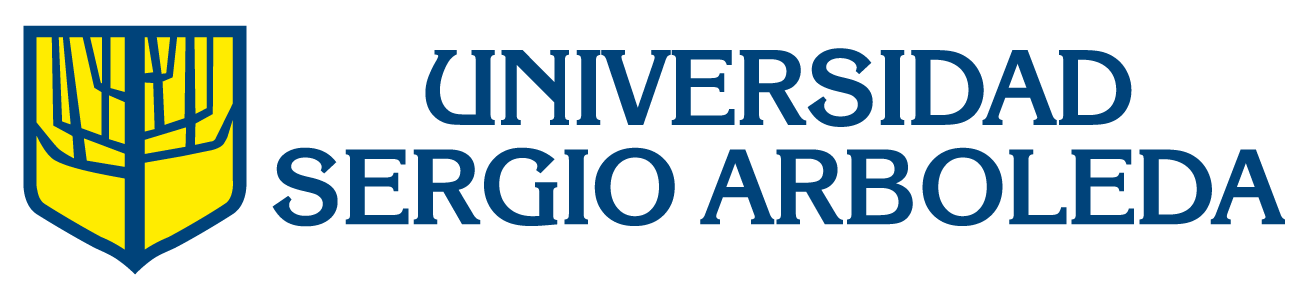




# **Programa de Ciencias de la Computacion e Inteligencia Artificial**
---
**Autor:** Pedro Luis Cardenas Diaz

**Fecha:** 22-11-2022

**Materia:** HPC-2

**Tema:** Parcial 3 de HPC-2

**Docente:** John Jairo Corredor Franco

#***Regresion Logistica***
**La regresion logistica** es un algoritmo de aprendizaje automatico que se utiliza para hacer predicciones con el fin de encontrar el valor de una variable dependiente, como: Maligno o benigno, spam o no spam, admitido o no admitido, sobrevivio o no sobrevivio, tiene cancer o no tiene cancer, entre otros. El algoritmo de regresion logistica se alimenta de las variables independientes relevante del problema.

#***Objetivos especificos***

    Seleccionar un dataset 
    Hacer una análitica de datos sobre el dataset seleccionado
    Modelar usando la regresión logística usando: Python, Scikit-Learn
    Modelar usando la regresión logística usando: C++, Eigen, Boost
    Comparar los modelos

#***EDA (Exploratory Data Analysis)***


In [ ]:
#Se importan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

El dataset que se utilizara para este proyecto es el de "Cars - Purchase Decision Dataset"

In [ ]:
#Se obtiene el dataframe de la url y se verifica su funcionamiento
dfCarData = pd.read_csv('/content/car_data.csv')
dfCarData.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


Debido a que el dataset tiene su booleano en la parte derecha, no es necesario realizar algun cambio a el dataset en lo que se refiere a posicionamiento de las columnas para el futuro uso de QTCreator en la comprobacion de los valores.

Por ende se procedera a realizar una verificacion de las variables en este dataset.

In [ ]:
#Se verifica el dataset a traves de .info
dfCarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


No se observa ningun dato perdido, debido a que Genero es una columna de tipo objeto, esta se ha de modificar de manera local para que esta sea de tipo int64.

Esto es posible debido a que los datos en Gender se pueden categorizar como booleanos debido a ser entre masculino y femenino, estos pasaran a ser 0 (male) y 1 (female).

In [ ]:
dfCarData = pd.read_csv('/content/car_data_modified.csv')
dfCarData.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [ ]:
dfCarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Gender        1000 non-null   int64
 2   Age           1000 non-null   int64
 3   AnnualSalary  1000 non-null   int64
 4   Purchased     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


El dataset terminara teniendo una columna para User ID, Genero (0 male - 1 female), Age, Annual Salary y Purchased (0 No - 1 Yes), todas estas tendran como typo de dato int64.

==================================================================

#***Estadisticas***

Se utilizan los datos del dataset para calcular el promedio

***Promedio:*** Se interpreta como *punto de equilibrio* o *centro de masas del conjunto de datos*. Es un cálculo muy sencillo en el que intervienen todos los datos.

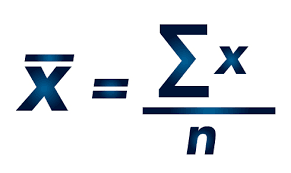

**Promedio** = Sumatoria de los resultados / cantidad de resultados

In [ ]:
dfCarData.mean()

User ID           500.500
Gender              0.516
Age                40.106
AnnualSalary    72689.000
Purchased           0.402
dtype: float64

=====================================================

A travez de la biblioteca Sklearn de la importacion de nombre normalize, se realiza la normalizacion de los datos de los datasets.

***Normalizar:*** Es el comprimir comprimir o extender los valores de la variable para que estén en un rango definido.

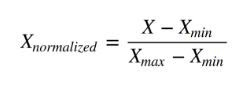

X = Dato a normalizar

Xmin = Menor dato entre los datos a normalizar

Xmax = Mayor dato entre los datos a normalizar


In [ ]:
dfCarData_norm = normalize(dfCarData)

In [ ]:
dfCarData_norm

array([[1.92464049e-02, 0.00000000e+00, 1.74967317e-03, 9.99813240e-01,
        0.00000000e+00],
       [1.56532477e-02, 0.00000000e+00, 9.19427179e-04, 9.99877058e-01,
        0.00000000e+00],
       [4.77021495e-03, 0.00000000e+00, 6.62154483e-04, 9.99988403e-01,
        0.00000000e+00],
       ...,
       [2.93861541e-03, 7.22018528e-06, 2.02165188e-04, 9.99995662e-01,
        7.22018528e-06],
       [2.23133759e-03, 7.46266751e-06, 3.58208040e-04, 9.99997446e-01,
        7.46266751e-06],
       [9.34652883e-03, 1.36048455e-05, 5.98613200e-04, 9.99956141e-01,
        0.00000000e+00]])

==================================

Se  hace uso de la biblioteca de numpy para calcular la desviacion estandar por cada una de las columnas del DataSet a travez de uno de los metodos que trae la biblioteca.

***Desviacion estandar:*** Es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.

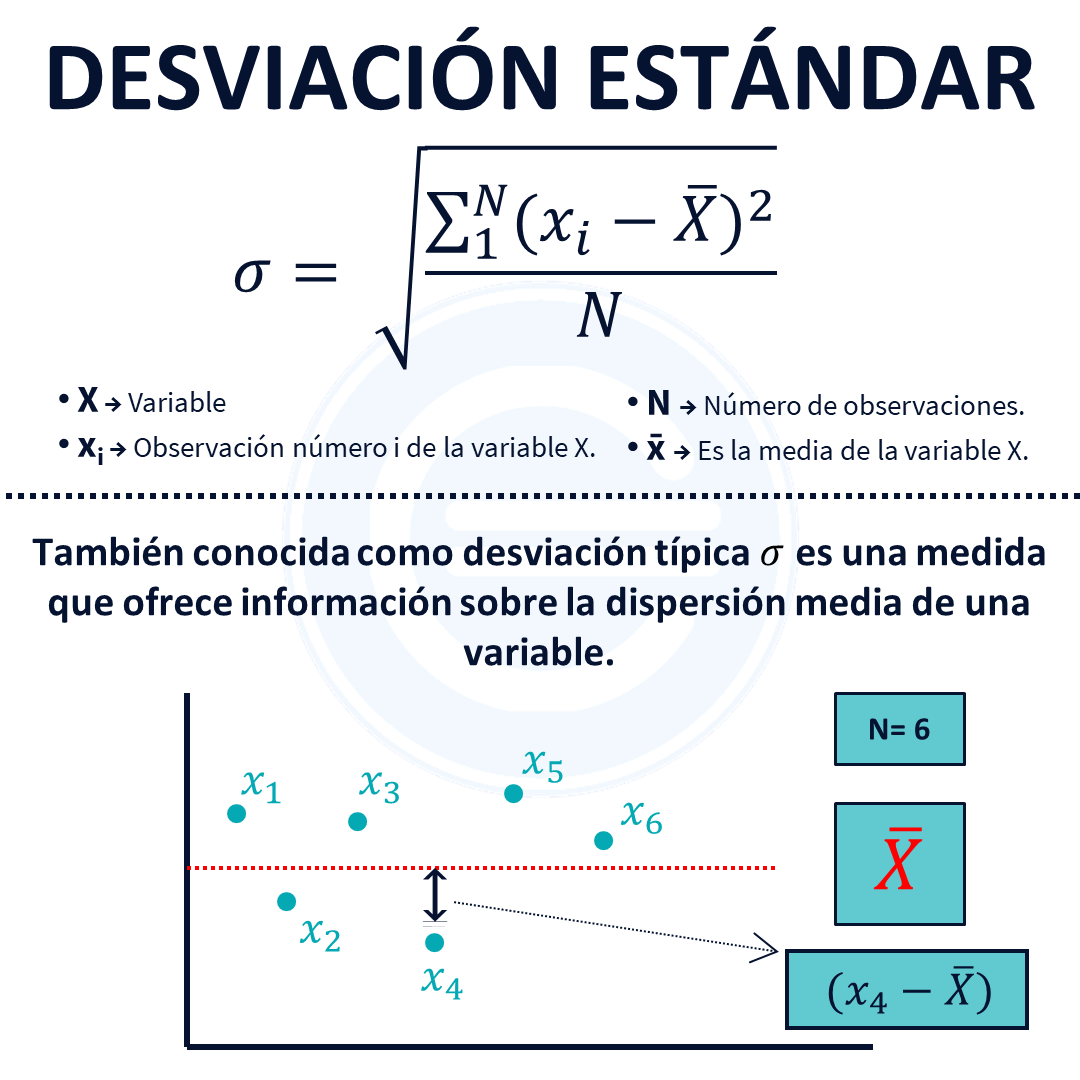

In [ ]:
np.std(dfCarData)

User ID           288.674990
Gender              0.499744
Age                10.701718
AnnualSalary    34471.093383
Purchased           0.490302
dtype: float64

====================================

#***Graficas***


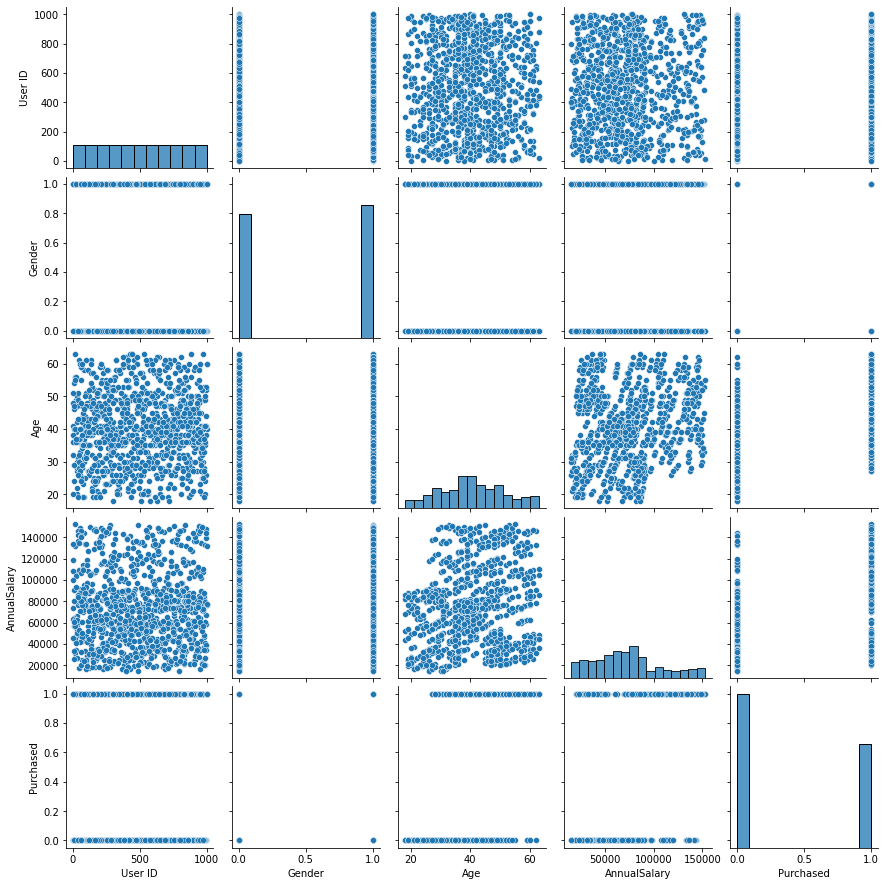

In [ ]:
sns.pairplot(dfCarData)

#***Logistic Regression***


In [ ]:
#Separar el dataset entre "features" y "Target variable" (dependiente e independiente).
cardata_cols = ['User ID','Gender','Age','AnnualSalary']
X = dfCarData[cardata_cols]
y = dfCarData.Purchased 

In [ ]:
#Se separan los datos en train y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8) 

In [ ]:
#Se inicializa el modelo
modeloLR = LogisticRegression()

In [ ]:
#Se entrena el modelo
modeloLR.fit(X_train,y_train) 

LogisticRegression()

In [ ]:
#Se realiza una prediccion
y_pred=modeloLR.predict(X_test) 

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

=========================================

#***Metrica de rendimiento***
La metrica de rendimiento utilizada en este modelo de regresion logistica fue la metrica de Accuracy, para esto sacaremos primero la matriz de confusion.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

In [ ]:
cnf_matrix 

array([[301, 182],
       [174, 143]])

Se observan que hay un total de 301 valores los cuales son True Positive y 143 que son True Negative mientras que existen 182 valores False Negative y 174 valores False Positive

In [ ]:
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy Test: 0.555


================================================

#***Comparacion***

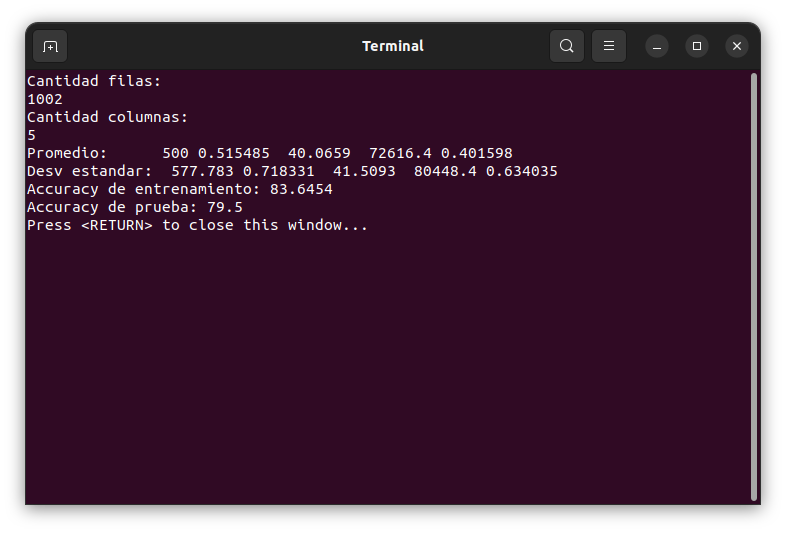

Se observa que el promedio corresponde en C++ y Python, la desviacion estandar corresponde a diferentes valores en ambos casos y de igual manera se observa que el accuracy en test/prueba tiene una diferencia de mas del 20%.

============================================

#***Conclusiones***



*   El dataset utilizado para la realizacion de este trabajo no tenia datos perdidos a la hora de realizar la verificacion de estos


*   Debido a que el dataset poseia un tipo de dato object en una de sus columnas se fue necesario realizar la modificacion de este para poder evitar la perdida de datos o un posible error a la hora de comparar o utilizar sklearn.

*   El salario anual promedio de usuarios de la empresa corresponde a $72,689

*   El promedio que se obtuvo entre C++ y Python corresponden entre lo obtenido en C++ y Python

*   La desviacion estandar y el accuracy que se obtuvo entre C++ y Python corresponden a ningun valor cercano entre ellos, esto se debe posiblemente a un problema en las formulas utilizadas en C++ o Python, y se es necesario realizar una revision a ambos entornos para una correcion a esto. 

*   Teniendo en cuenta las graficas, se observa que hay una mayor cantidad de personas que no compran el vehiculo comparado a aquellos que lo compran.


*   Se observa en una de las graficas que el genero que mas busca comprar un vehiculo corresponde a el genero femenino.




==============================================

# **Referencias**



1.   https://www.javatpoint.com/accuracy_score-in-sklearn
2.   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3.   https://datascience.stackexchange.com/questions/78194/is-it-possible-to-have-stratified-train-test-split-of-a-set-based-on-two-columns
4.   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
5.   https://numpy.org/doc/stable/reference/generated/numpy.std.html
6.   https://numpy.org/doc/stable/reference/generated/numpy.mean.html
7.   https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6
8.   https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset?resource=download



